In [38]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
len(x_test)

10000

In [33]:
X = x_train[87]
X.shape

(28, 28)

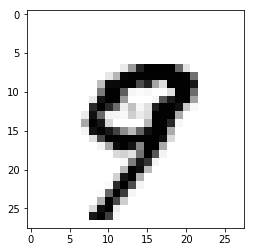

In [34]:
plt.imshow(X, cmap = 'Greys')

In [35]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [36]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [37]:
y_train[77]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [94]:
model = Sequential()
model.add(Dense(30, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(20))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='mse', optimizer=SGD(lr=0.3), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 30)                23550     
_________________________________________________________________
activation_102 (Activation)  (None, 30)                0         
_________________________________________________________________
dense_103 (Dense)            (None, 20)                620       
_________________________________________________________________
activation_103 (Activation)  (None, 20)                0         
_________________________________________________________________
dense_104 (Dense)            (None, 10)                210       
_________________________________________________________________
activation_104 (Activation)  (None, 10)                0         
_________________________________________________________________
dense_105 (Dense)            (None, 10)                110       
__________

In [95]:
model.fit(x_train, y_train, batch_size=200, epochs=80)

Epoch 1/80
60000/60000 [==============================] - 2s 27us/step - loss: 0.0911 - acc: 0.1180
Epoch 2/80
60000/60000 [==============================] - 1s 18us/step - loss: 0.0900 - acc: 0.1958
Epoch 3/80
60000/60000 [==============================] - 1s 19us/step - loss: 0.0897 - acc: 0.1869
Epoch 4/80
60000/60000 [==============================] - 1s 20us/step - loss: 0.0895 - acc: 0.1888
Epoch 5/80
60000/60000 [==============================] - 1s 21us/step - loss: 0.0893 - acc: 0.1944
Epoch 6/80
60000/60000 [==============================] - 1s 20us/step - loss: 0.0891 - acc: 0.1997
Epoch 7/80
60000/60000 [==============================] - 1s 18us/step - loss: 0.0889 - acc: 0.1991
Epoch 8/80
60000/60000 [==============================] - 1s 18us/step - loss: 0.0887 - acc: 0.2031
Epoch 9/80
60000/60000 [==============================] - 1s 19us/step - loss: 0.0885 - acc: 0.2046
Epoch 10/80
60000/60000 [==============================] - 2s 26us/step - loss: 0.0882 - acc: 0.2052

In [96]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 1s 65us/step
loss: 0.01628723304197192
正確率 0.9021
